In [6]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('database/student_performance_cleaned.csv') 

In [28]:
#Identify Categorical and Numerical Data

# Get numeric columns
num_cols = df.select_dtypes(include="number").columns.tolist()

# Remove the index column if it exists
if "index" in num_cols:
    num_cols.remove("index")

# Get categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Print results
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables (index removed):")
print(num_cols)

Categorical Variables:
['resources', 'extracurricular', 'motivation', 'internet', 'gender', 'learningstyle', 'discussions', 'edutech', 'stresslevel', 'finalgrade']
Numerical Variables (index removed):
['studyhours', 'attendance', 'age', 'onlinecourses', 'assignmentcompletion', 'examscore']


RQ1: Engagement Levels Across Different Demographics




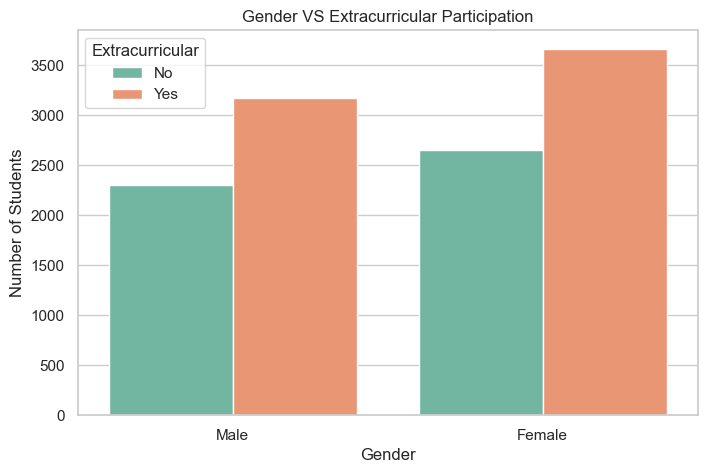

<Figure size 800x500 with 0 Axes>

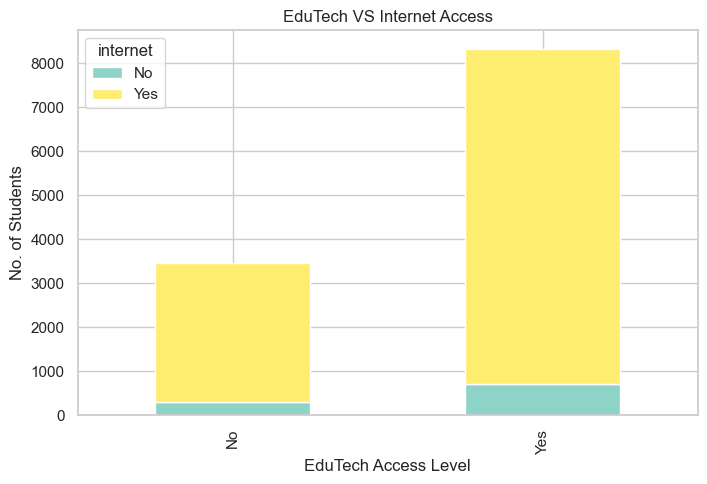

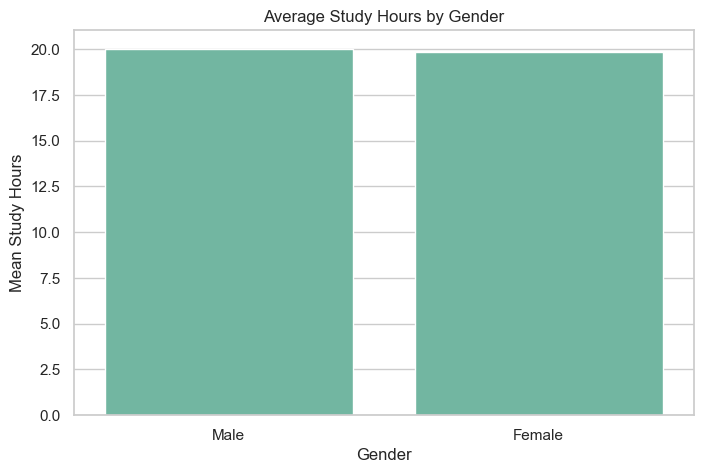

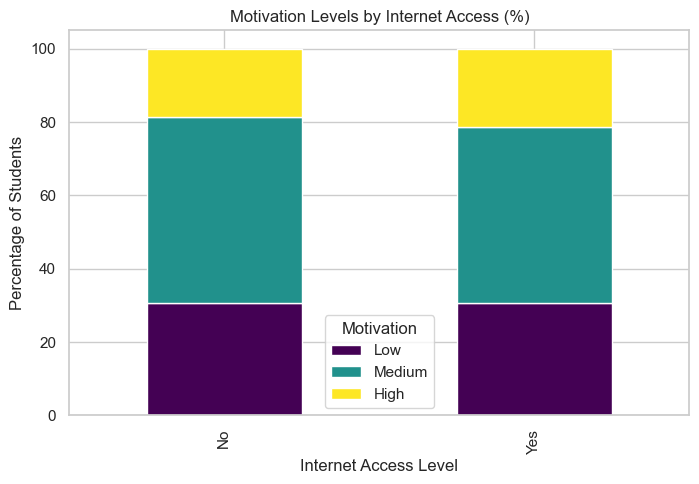

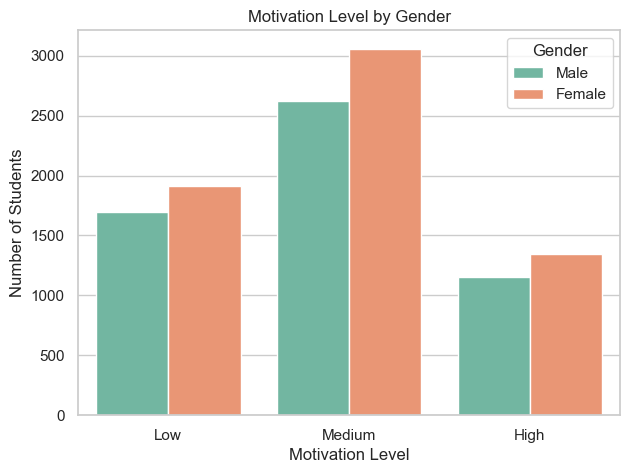

In [36]:
# ===== Bivariate Analysis =====
#RQ1: What is the prevalence of Student Engagement across different demographics? 
sns.set(style="whitegrid", palette="Set2")

print("RQ1: Engagement Levels Across Different Demographics")

#Gender VS Extracurriculars - Count Plot / Bar Plot
plt.figure(figsize=(8,5))
sns.countplot(x="gender", hue="extracurricular", data=df)
plt.title("Gender VS Extracurricular Participation")
plt.xlabel("Gender")
plt.ylabel("Number of Students")
plt.legend(title="Extracurricular")
plt.show 
print("\n")

""" ================== NOTES ======================== 
Female students make up a majority of those participating in extracurricular activities. 
"""

#EduTech VS Internet Access - Stacked Bar Chart
plt.figure(figsize=(8,5))
pd.crosstab(df["edutech"], df["internet"]).plot(kind="bar", stacked=True, figsize=(8,5), colormap="Set3")
plt.title("EduTech VS Internet Access")
plt.xlabel("EduTech Access Level")
plt.ylabel("No. of Students")
plt.show()
print("\n")

""" ================== NOTES ======================== 
Students with EduTech access are more likely to have reliable internet, 
suggesting these factors may influence engagement. 

A majority of students with EduTech access also have Internet access, 
which is expected since most educational technology tools require online connectivity.
Interestingly, even among students without EduTech access, most still have Internet access. 

This suggests that while Internet connectivity is relatively widespread, not all students are 
utilizing educational technology platforms, possibly due to factors like lack of awareness, training, or institutional support.

Overall, the results indicate that Internet availability is not the main barrier to EduTech adoption — rather, 
engagement and implementation of technology-based learning tools may be the determining factors.
"""

#Gender vs Average Study Hours - Bar Plot
plt.figure(figsize=(8,5))
sns.barplot(x="gender", y="studyhours", data=df, ci=None)
plt.title("Average Study Hours by Gender")
plt.xlabel("Gender")
plt.ylabel("Mean Study Hours")
plt.show()
print("\n")

""" ================== NOTES ======================== 
Male and Female students have a near identical average study hour, with males slightly being higher. 
"""
#  Internet Access vs Motivation 
internet_motivation = pd.crosstab(df['internet'], df['motivation'], normalize='index') * 100
internet_motivation.plot(kind='bar', stacked=True, colormap='viridis', figsize=(8,5))
plt.title("Motivation Levels by Internet Access (%)")
plt.xlabel("Internet Access Level")
plt.ylabel("Percentage of Students")
plt.legend(title="Motivation")

plt.show()

""" ================== NOTES ======================== 
Students with Internet Access have higher motivation levels. 
"""

#Motivation Level by Gender
plt.figure(figsize=(7,5))
sns.countplot(x='motivation', hue='gender', data=df, palette='Set2')
plt.title("Motivation Level by Gender")
plt.xlabel("Motivation Level")
plt.ylabel("Number of Students")
plt.legend(title="Gender")
plt.show()


Motivation Distribution (%):
motivation
Medium    48.193384
Low       30.610687
High      21.195929
Name: proportion, dtype: float64

Percentage of Grades per Motivation Level: 

finalgrade  Average  Excellent   Fail   Good
motivation                                  
High          22.37      23.85  26.85  26.93
Low           24.33      22.78  26.66  26.24
Medium        23.95      23.16  28.02  24.87
RQ2: Correlation Between Engagement Factors


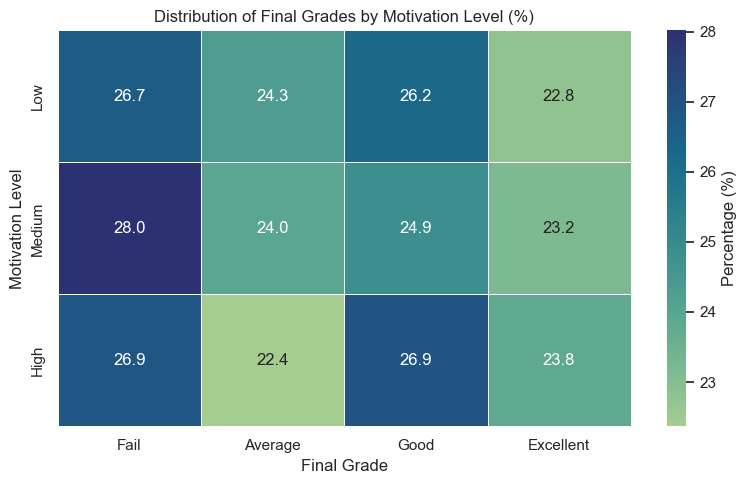

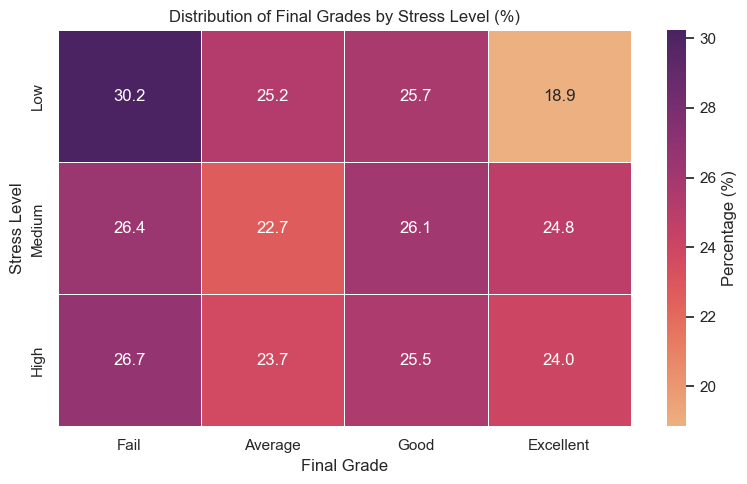

" ================== NOTES ======================== \nStudents with medium levels of stress are more likely to excel. \nStudents with with low levels of stress are the most likely to fail, likely due to the fact they don't feel much pressure to excel. \n======================================================"

In [30]:
# Bivariate Analysis - Research Question 2: Which factors show the strongest correlation with higher and lower student engagement?
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(style="whitegrid", palette="Set2")

# Checking if Medium Motivation dominates the data set
motivation_dist = df['motivation'].value_counts(normalize=True) * 100
print("Motivation Distribution (%):")
print(motivation_dist)

# Crosstab: percentage of grades per motivation level
motivation_crosstab = pd.crosstab(df['motivation'], df['finalgrade'], normalize='index') * 100
print("\nPercentage of Grades per Motivation Level: \n")
print(motivation_crosstab.round(2))

# Define correct grade, motivation, and stress order
df['finalgrade'] = pd.Categorical(df['finalgrade'], categories=['Fail', 'Average', 'Good', 'Excellent'], ordered=True)
df['motivation'] = pd.Categorical(df['motivation'], categories=['Low', 'Medium', 'High'], ordered=True)
df['stresslevel'] = pd.Categorical(df['stresslevel'], categories=['Low', 'Medium', 'High'], ordered=True)

print("RQ2: Correlation Between Engagement Factors")

# --- Motivation VS Final Grade ---
plt.figure(figsize=(8,5))
crosstab_motivation = pd.crosstab(df['motivation'], df['finalgrade'], normalize='index') * 100
sns.heatmap(
    crosstab_motivation,
    annot=True,
    cmap="crest",  # perceptually uniform color map
    fmt=".1f",
    linewidths=0.5,
    vmin=crosstab_motivation.values.min(),
    vmax=crosstab_motivation.values.max(),
    cbar_kws={'label': 'Percentage (%)'}
)
plt.title("Distribution of Final Grades by Motivation Level (%)")
plt.xlabel("Final Grade")
plt.ylabel("Motivation Level")
plt.tight_layout()
plt.show()

""" ================== NOTES ======================== 
The reasons for why it shows students under medium motivation are more likely to fail is because of uneven motivation distribution.
"Medium" dominates. This may affect the model's ability to predict minority categories like "low" or "High" Motivations
In Machine Learning, Vigneesh needs to fix the imbalance for underrepresented classes.

Students with high motivation are likely to excel. 

This pattern suggests a non-linear relationship. 
======================================================""" 

# --- Stress Level VS Final Grade ---
plt.figure(figsize=(8,5))
crosstab_stress = pd.crosstab(df['stresslevel'], df['finalgrade'], normalize='index') * 100
sns.heatmap(
    crosstab_stress,
    annot=True,
    cmap="flare",  # contrasting palette to crest
    fmt=".1f",
    linewidths=0.5,
    vmin=crosstab_stress.values.min(),
    vmax=crosstab_stress.values.max(),
    cbar_kws={'label': 'Percentage (%)'}
)
plt.title("Distribution of Final Grades by Stress Level (%)")
plt.xlabel("Final Grade")
plt.ylabel("Stress Level")
plt.tight_layout()
plt.show()

""" ================== NOTES ======================== 
Students with medium levels of stress are more likely to excel. 
Students with with low levels of stress are the most likely to fail, likely due to the fact they don't feel much pressure to excel. 
======================================================""" 



RQ2: Correlation Between Engagement Factors


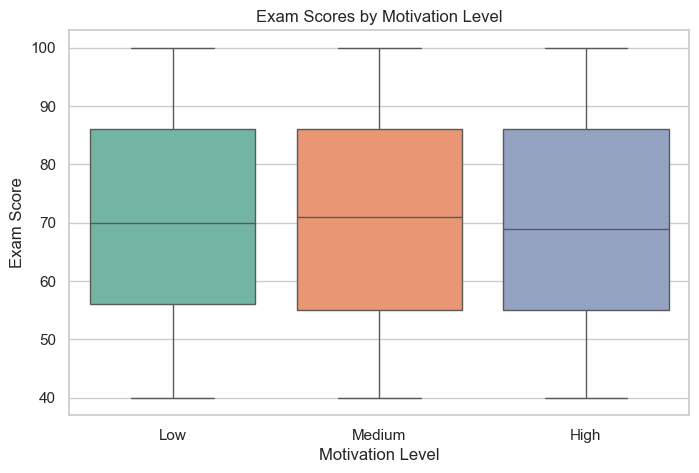

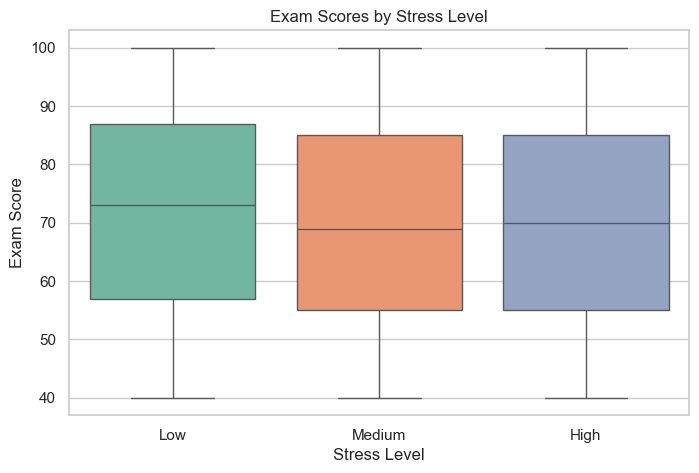

' ================== NOTES ======================== \nMoreover, students with low stress levels are said to score higher in examscores on average. \nStudents with medium stress levels score the lowest on average.\n======================================================'

In [31]:
# Bivariate Analysis - Research Question 2: Which factors show the strongest correlation with higher and lower student engagement?
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(style="whitegrid", palette="Set2")

print("RQ2: Correlation Between Engagement Factors")

# --- Motivation VS Exam Scores ---
plt.figure(figsize=(8,5))
sns.boxplot(x='motivation', y='examscore', data=df, palette='Set2')
plt.title('Exam Scores by Motivation Level')
plt.xlabel('Motivation Level')
plt.ylabel('Exam Score')
plt.show()

""" ================== NOTES ======================== 
The median exam score is lower for students with high motivation. This might indicate that a few high motivation students performed 
poorly on the exams, skewing the median. 

Students with medium motivation level typically have higher exam scores.

The median exam scores for Low and Medium motivation are roughly the same (around 70–72), while High motivation has a slightly lower median.

Overall, motivation doesn’t appear to have a strong or linear effect on exam scores in the dataset.

======================================================""" 

# --- Stress Level VS Exam Score ---
plt.figure(figsize=(8,5))
sns.boxplot(x='stresslevel', y='examscore', data=df, palette='Set2')
plt.title('Exam Scores by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Exam Score')
plt.show()

""" ================== NOTES ======================== 
Moreover, students with low stress levels are said to score higher in examscores on average. 
Students with medium stress levels score the lowest on average.
======================================================""" 



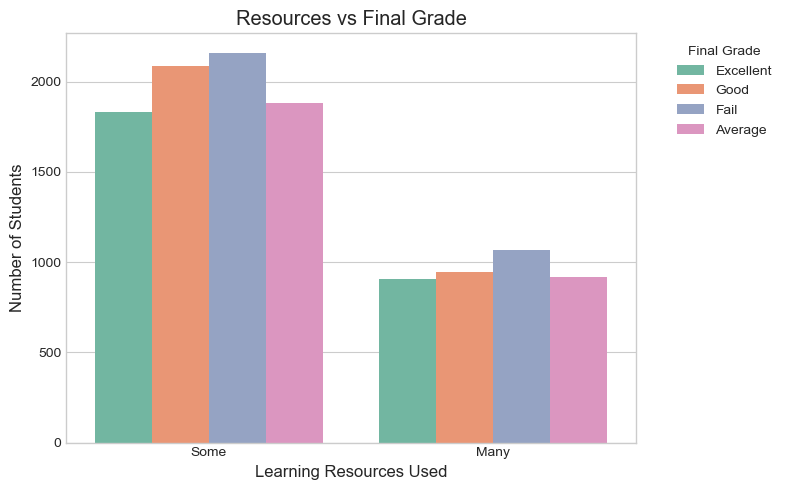

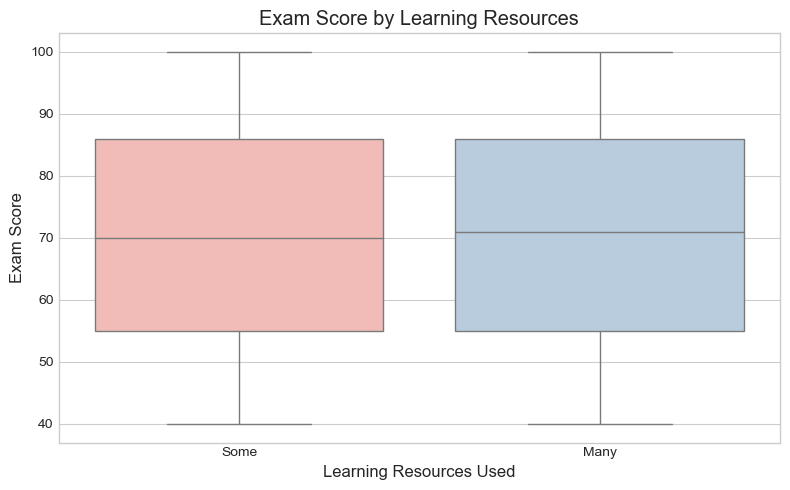

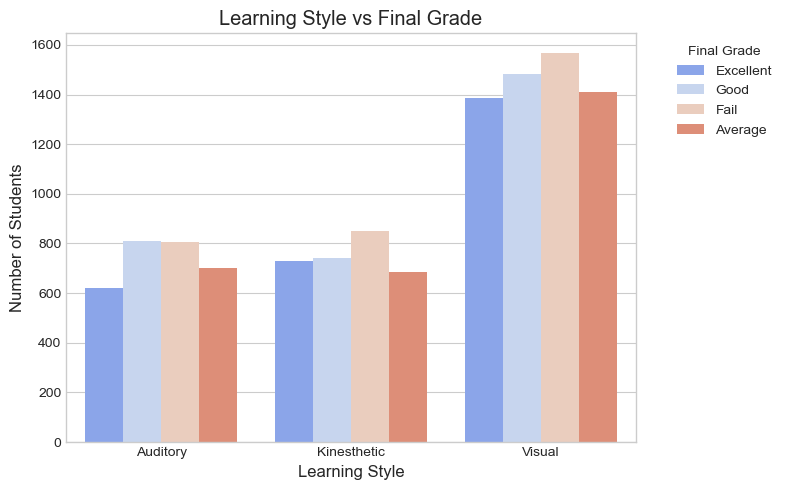

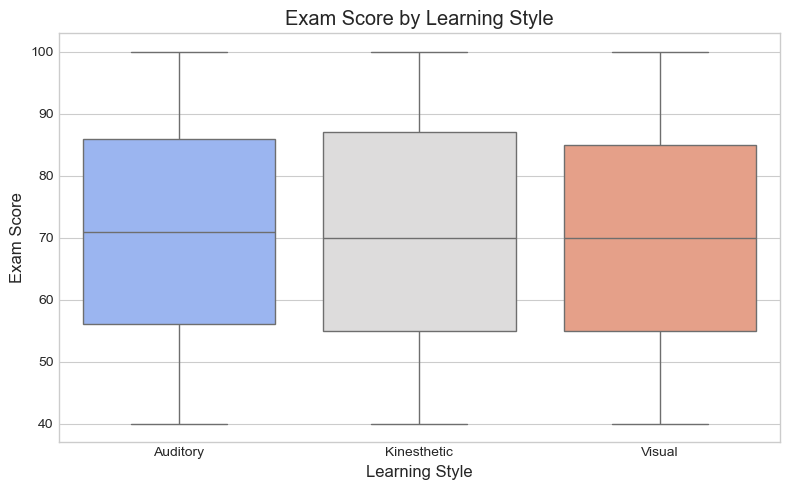

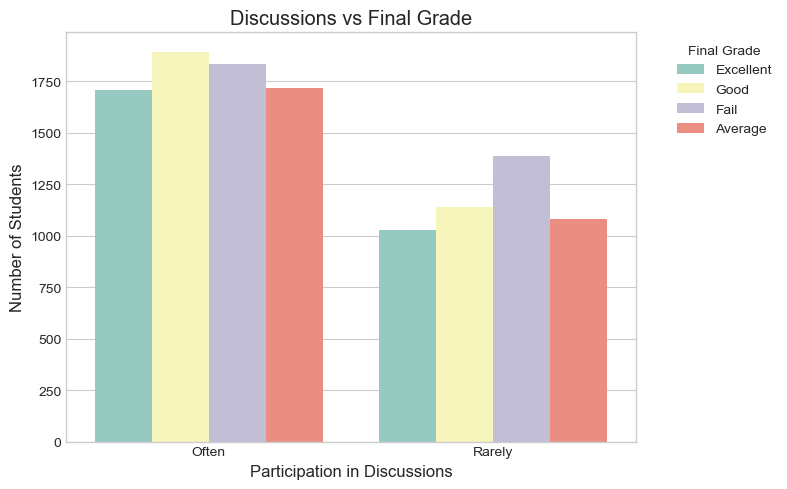

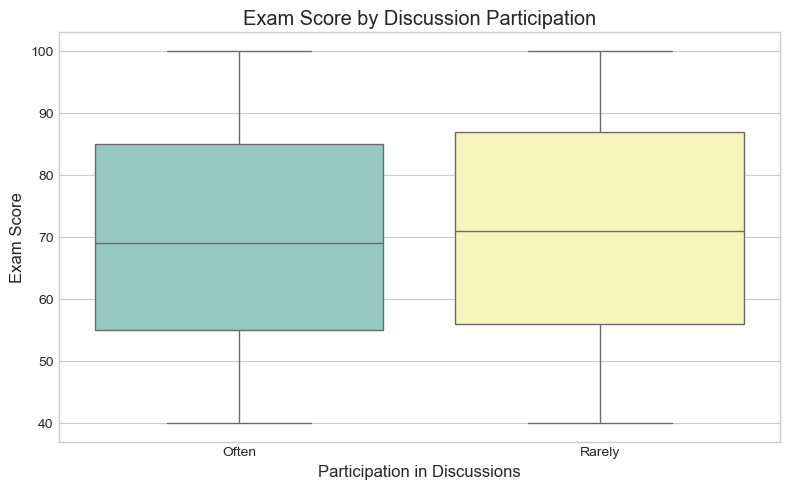

In [21]:
# Bivariate Analysis - Research Question 2: Which factors show the strongest correlation with higher and lower student engagement?

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')


# Resources vs Final Grade
plt.figure(figsize=(8,5))
sns.countplot(x='resources', hue='finalgrade', data=df, palette='Set2')
plt.title("Resources vs Final Grade")
plt.xlabel("Learning Resources Used")
plt.ylabel("Number of Students")
plt.legend(title="Final Grade", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Resources vs Exam Score

plt.figure(figsize=(8,5))
sns.boxplot(x='resources', y='examscore', data=df, palette='Pastel1')
plt.title("Exam Score by Learning Resources")
plt.xlabel("Learning Resources Used")
plt.ylabel("Exam Score")
plt.tight_layout()
plt.show()


# Learning Style vs Final Grade
plt.figure(figsize=(8,5))
sns.countplot(x='learningstyle', hue='finalgrade', data=df, palette='coolwarm')
plt.title("Learning Style vs Final Grade")
plt.xlabel("Learning Style")
plt.ylabel("Number of Students")
plt.legend(title="Final Grade", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Learning Style vs Exam Score
plt.figure(figsize=(8,5))
sns.boxplot(x='learningstyle', y='examscore', data=df, palette='coolwarm')
plt.title("Exam Score by Learning Style")
plt.xlabel("Learning Style")
plt.ylabel("Exam Score")
plt.tight_layout()
plt.show()

# Discussions vs Final Grade
plt.figure(figsize=(8,5))
sns.countplot(x='discussions', hue='finalgrade', data=df, palette='Set3')
plt.title("Discussions vs Final Grade")
plt.xlabel("Participation in Discussions")
plt.ylabel("Number of Students")
plt.legend(title="Final Grade", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Discussions vs Exam Score
plt.figure(figsize=(8,5))
sns.boxplot(x='discussions', y='examscore', data=df, palette='Set3')
plt.title("Exam Score by Discussion Participation")
plt.xlabel("Participation in Discussions")
plt.ylabel("Exam Score")
plt.tight_layout()
plt.show()

In [32]:
""" ================== FINAL NOTES ===========================
Boxplots of exam scores indicate that students with medium motivation tend to have higher median scores, 
while high-motivation students show lower median exam scores, possibly due to outliers. Similarly, 
students with low stress levels have higher median exam scores compared to medium-stress students.

However, when examining final grades using a heatmap, a different pattern emerges: high-motivation students are more likely to achieve Excellent grades, 
and medium-stress students are more likely to obtain Excellent grades.the discrepancy arises because exam scores capture exact numeric performance, 
whereas final grades group scores into categories, which can smooth out outliers or highlight different patterns.

The box plot (Exam Scores) shows no strong difference in numeric exam performance by motivation.The heatmap (Final Grades) shows a 
clearer categorical pattern, with high motivation linked to better final outcomes.So, high motivation may influence overall performance, 
but not necessarily the exam score alone.

========================================================"""

' ================== FINAL NOTES ===========================\nBoxplots of exam scores indicate that students with medium motivation tend to have higher median scores, \nwhile high-motivation students show lower median exam scores, possibly due to outliers. Similarly, \nstudents with low stress levels have higher median exam scores compared to medium-stress students.\n\nHowever, when examining final grades using a heatmap, a different pattern emerges: high-motivation students are more likely to achieve Excellent grades, \nand medium-stress students are more likely to obtain Excellent grades.the discrepancy arises because exam scores capture exact numeric performance, \nwhereas final grades group scores into categories, which can smooth out outliers or highlight different patterns.\n\nThe box plot (Exam Scores) shows no strong difference in numeric exam performance by motivation.The heatmap (Final Grades) shows a \nclearer categorical pattern, with high motivation linked to better final 

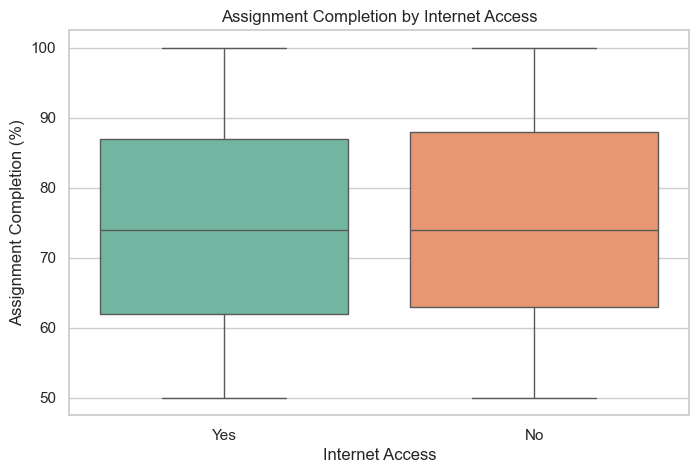

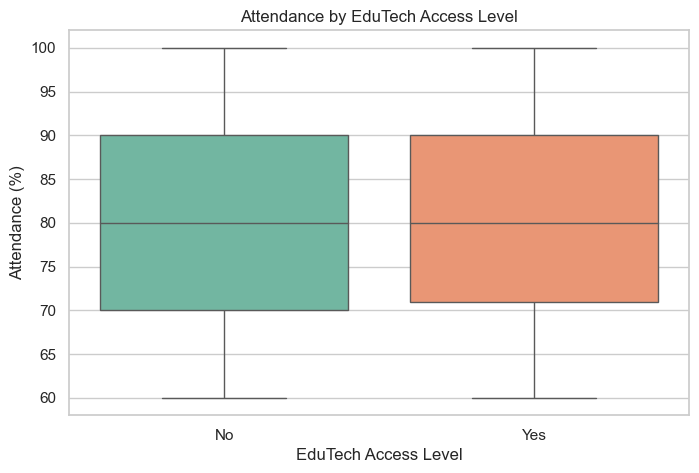

" ================== NOTES ======================== \nThe Box Plot compares Attendance by EduTech Access Level.\n\nBoth boxplots are the same, telling us that Attendance isn't majorly affected by EduTech Access Level. \n\nStudents without EduTech access have attendance rates ranging from 70–90%.\nStudents with EduTech access range from 72–90%, showing a slightly narrower range and higher minimum attendance.\nThis suggests that while the median is the same, students with EduTech access are more consistent in their attendance — fewer students fall below 70%.\n\nBoth groups have similar median attendance levels, but students with EduTech access display slightly higher and more consistent attendance rates, \nsuggesting that EduTech may help reduce attendance variability without significantly increasing the average.\n======================================================"

In [33]:
# Bivariate Analysis - Research Question 2: Which factors show the strongest correlation with higher and lower student engagement?

# Assignment Completion vs Internet Access
plt.figure(figsize=(8,5))
sns.boxplot(x='internet', y='assignmentcompletion', data=df, palette='Set2')
plt.title('Assignment Completion by Internet Access')
plt.xlabel('Internet Access')
plt.ylabel('Assignment Completion (%)')
plt.show()

""" ================== NOTES ======================== 
The Box Plot compares assignment completion by internet access. 
Both groups (students with and without internet access) have nearly identical median assignment completion rates (around 75%). This suggests internet
access alone does not strongly affect how many assignments students complete. 

Both boxes have a wide interquartile range (IQR), meaning there’s high variability in assignment completion among students regardless of access.

The whiskers extend roughly from 50% to 100% in both groups, showing that some students do extremely well or extremely poorly in both conditions.

Having Internet access does not guarantee higher assignment completion rates — students without access seem to perform just as well on average.

This could suggest:

 + Students might find alternative ways to complete assignments (offline resources, shared access, school computers).

 + Or, Internet access alone is not the main driver — factors like motivation, time management, and support may play bigger roles.

======================================================""" 

# Attendance vs EduTech Access
plt.figure(figsize=(8,5))
sns.boxplot(x='edutech', y='attendance', data=df, palette='Set2')
plt.title('Attendance by EduTech Access Level')
plt.xlabel('EduTech Access Level')
plt.ylabel('Attendance (%)')
plt.show()

""" ================== NOTES ======================== 
The Box Plot compares Attendance by EduTech Access Level.

Both boxplots are the same, telling us that Attendance isn't majorly affected by EduTech Access Level. 

Students without EduTech access have attendance rates ranging from 70–90%.
Students with EduTech access range from 72–90%, showing a slightly narrower range and higher minimum attendance.
This suggests that while the median is the same, students with EduTech access are more consistent in their attendance — fewer students fall below 70%.

Both groups have similar median attendance levels, but students with EduTech access display slightly higher and more consistent attendance rates, 
suggesting that EduTech may help reduce attendance variability without significantly increasing the average.
======================================================""" 

RQ3: Engagement Variables vs Final Grade



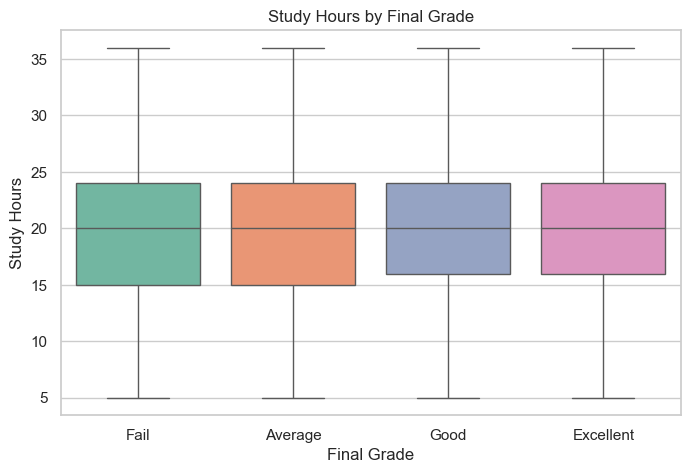

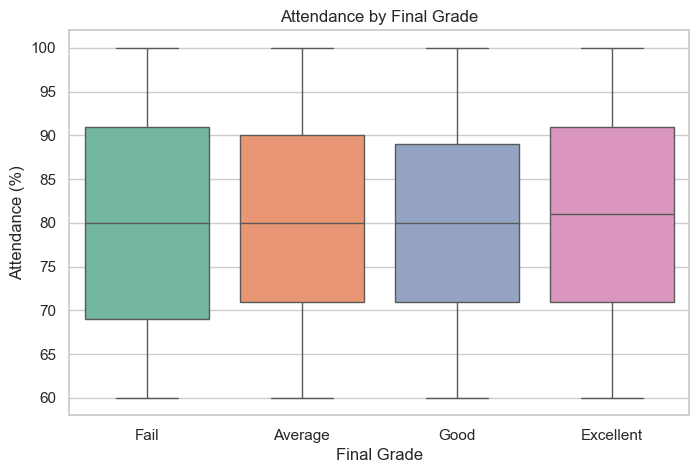

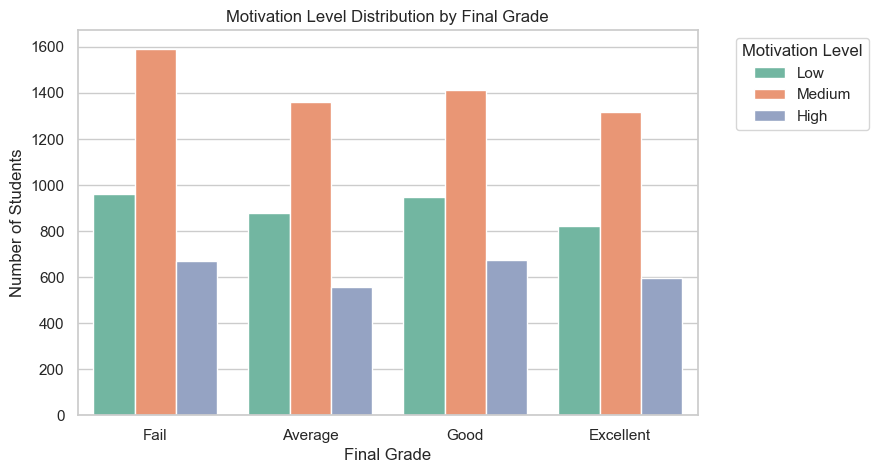

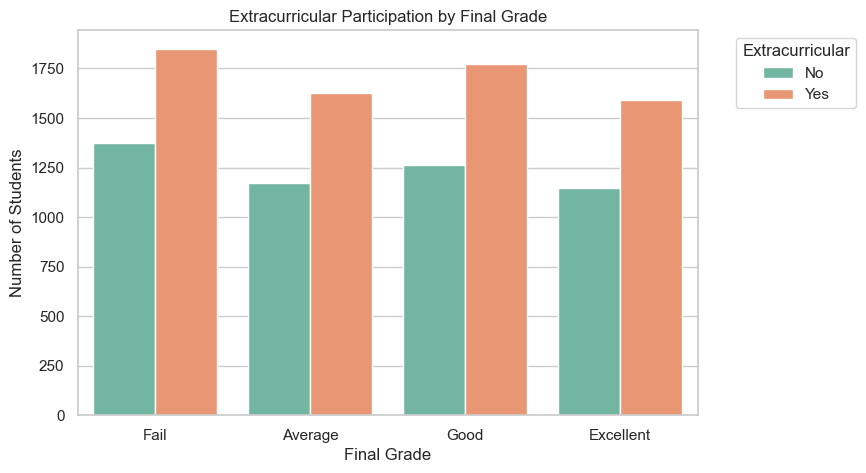

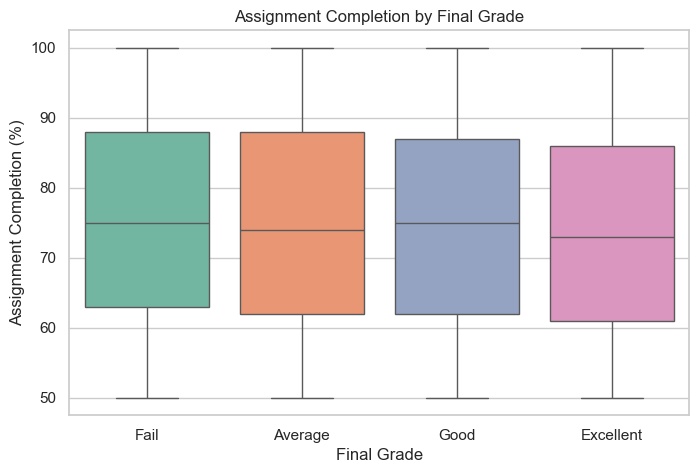

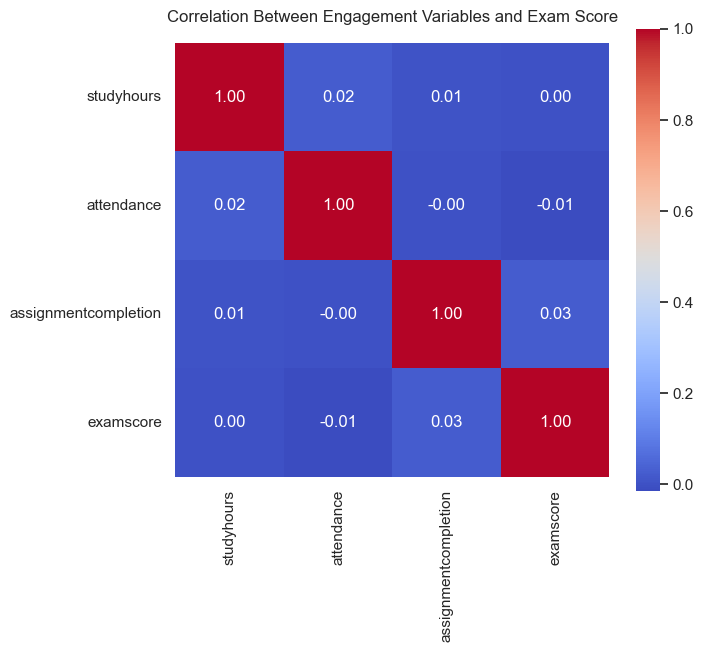

' ================== NOTES ======================== \nThere are little to no correlation between Engagement Variables and Exam Score. There is no strong linear relationship with Exam Score.\n======================================================'

In [34]:
# Bivariate Analysis - Research Question 3: How do the 5 core engagement variables relate to Final Grade and Exam Scores?
print("RQ3: Engagement Variables vs Final Grade\n")

# Convert numerical columns to numeric
numerical_columns = ['studyhours', 'attendance', 'assignmentcompletion']
for col in numerical_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')


# Study Hours VS Final Grade
plt.figure(figsize=(8, 5))
sns.boxplot(x='finalgrade', y='studyhours', data=df, palette='Set2', showfliers=True)
plt.title("Study Hours by Final Grade")
plt.xlabel("Final Grade")
plt.ylabel("Study Hours")
plt.show()


# Attendance VS Final Grade
plt.figure(figsize=(8, 5))
sns.boxplot(x='finalgrade', y='attendance', data=df, palette='Set2', showfliers=True)
plt.title("Attendance by Final Grade")
plt.xlabel("Final Grade")
plt.ylabel("Attendance (%)")
plt.show()


# Motivation VS Final Grade
plt.figure(figsize=(8, 5))
sns.countplot(x='finalgrade', hue='motivation', data=df, palette='Set2')
plt.title("Motivation Level Distribution by Final Grade")
plt.xlabel("Final Grade")
plt.ylabel("Number of Students")
plt.legend(title="Motivation Level", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Extracurricular VS Final Grade
plt.figure(figsize=(8, 5))
sns.countplot(x='finalgrade', hue='extracurricular', data=df, palette='Set2')
plt.title("Extracurricular Participation by Final Grade")
plt.xlabel("Final Grade")
plt.ylabel("Number of Students")
plt.legend(title="Extracurricular", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Assignment Completion VS Final Grade
plt.figure(figsize=(8, 5))
sns.boxplot(x='finalgrade', y='assignmentcompletion', data=df, palette='Set2', showfliers=True)
plt.title("Assignment Completion by Final Grade")
plt.xlabel("Final Grade")
plt.ylabel("Assignment Completion (%)")
plt.show()

# Correlation Heatmap (Numerical Predictors VS Exam Score)
numerical_vars = ['studyhours', 'attendance', 'assignmentcompletion', 'examscore']
corr_subset = df[numerical_vars].corr()

plt.figure(figsize=(7, 6))
sns.heatmap(corr_subset, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Between Engagement Variables and Exam Score", pad=15)
plt.show()

""" ================== NOTES ======================== 
There are little to no correlation between Engagement Variables and Exam Score. There is no strong linear relationship with Exam Score.
======================================================""" 


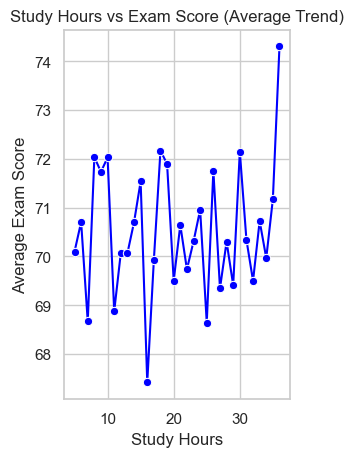

In [37]:
# Study Hours vs Exam Score - Numerical VS Numerical (Line Graph)
# Group by study hours and compute mean exam score
avg_scores = df.groupby('studyhours')['examscore'].mean().reset_index()

# Plot the line graph
sns.lineplot(data=avg_scores, x='studyhours', y='examscore', marker='o', color='blue')

plt.title("Study Hours vs Exam Score (Average Trend)")
plt.xlabel("Study Hours")
plt.ylabel("Average Exam Score")
plt.grid(True)


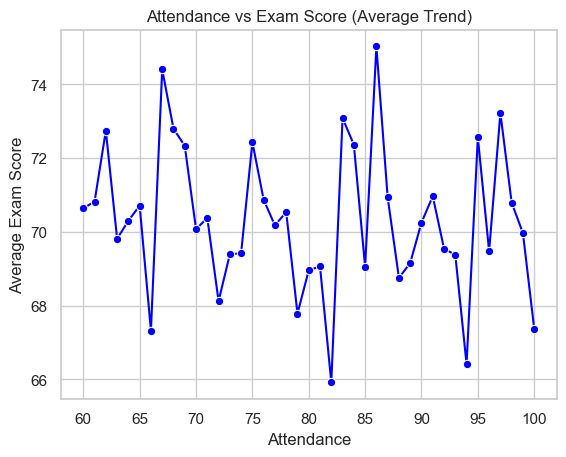

In [40]:
# Attendance vs Exam Score - Numerical VS Numerical (Line Graph)
avg_attendance = df.groupby('attendance')['examscore'].mean().reset_index()

# Plot the line graph
sns.lineplot(data=avg_attendance, x='attendance', y='examscore', marker='o', color='blue')

plt.title("Attendance vs Exam Score (Average Trend)")
plt.xlabel("Attendance")
plt.ylabel("Average Exam Score")
plt.grid(True)


,assignmentcompletion,examscore
assignmentcompletion,1.000000,0.025661
examscore,0.025661,1.000000


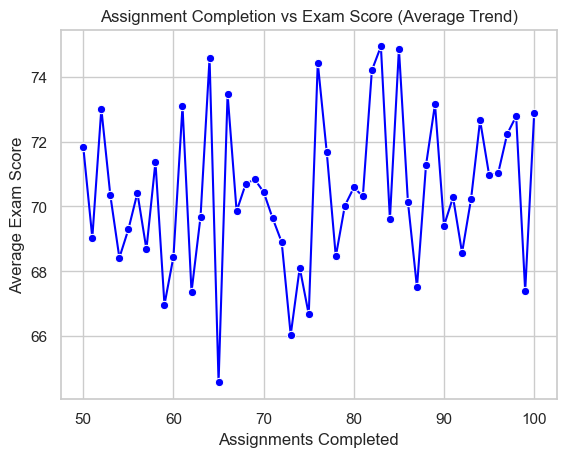

In [42]:
#Assignment Completion VS Exam Score
avg_assignment = df.groupby('assignmentcompletion')['examscore'].mean().reset_index()

# Plot the line graph
sns.lineplot(data=avg_assignment, x='assignmentcompletion', y='examscore', marker='o', color='blue')

plt.title("Assignment Completion vs Exam Score (Average Trend)")
plt.xlabel("Assignments Completed")
plt.ylabel("Average Exam Score")
plt.grid(True)

df[['assignmentcompletion', 'examscore']].corr()


In [ ]:
""" ============= FINAL NOTES ================
The line graphs between engagement variables (e.g., Assignment Completion vs Exam Score) show fluctuating patterns,
suggesting that there is no strong linear relationship between these variables.
However, this does not necessarily indicate the absence of a relationship. 
The relationship may be non-linear or influenced by other factors such as motivation or stress level.

In other words, higher engagement does not always translate directly into higher academic performance in a simple linear fashion. 
Other variables or thresholds might moderate this effect.
"""

<Axes: xlabel='studyhours', ylabel='examscore'>

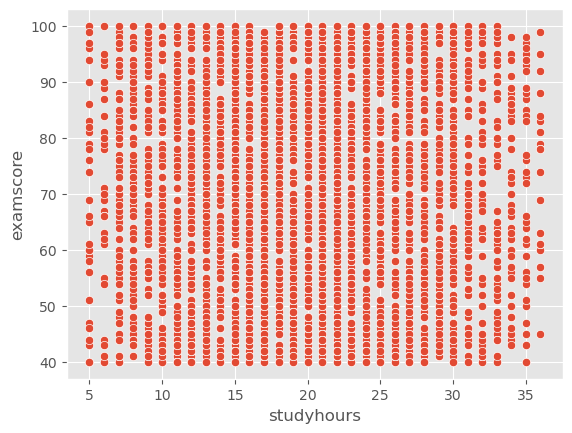

In [7]:

""" === Double Checking if studyhours VS examscore have no Linear Relationship ==="""
#Scatterplot for studyhours VS Examscore

import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='studyhours', y='examscore', data=df)


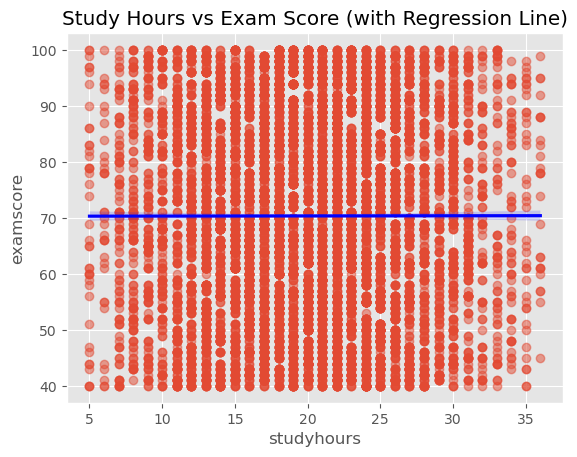

In [11]:
sns.regplot(x='studyhours', y='examscore', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'blue'})
plt.title('Study Hours vs Exam Score (with Regression Line)')
plt.show()


motivation
Medium    5682
Low       3609
High      2499
Name: count, dtype: int64

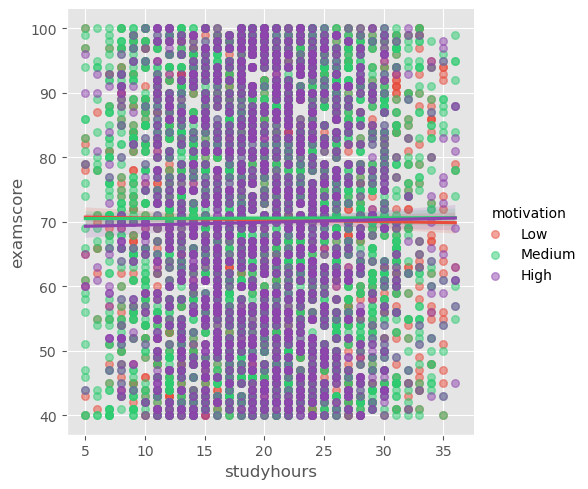

In [19]:
sns.lmplot(
    x='studyhours', 
    y='examscore', 
    hue='motivation', 
    data=df,
    palette={'Low': '#e74c3c', 'Medium': '#2ecc71', 'High': '#8e44ad'},
    hue_order=['Low', 'Medium', 'High'],  # ensure drawing order
    scatter_kws={'alpha':0.5, 's':30}  # transparency and size
)


df['motivation'].value_counts()


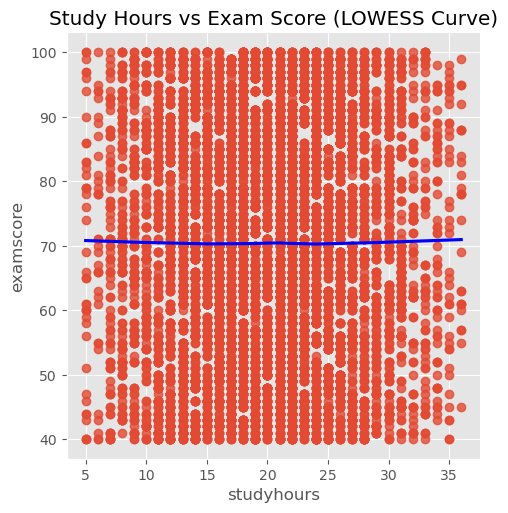

In [13]:
sns.lmplot(x='studyhours', y='examscore', data=df, lowess=True, line_kws={'color':'blue'})
plt.title('Study Hours vs Exam Score (LOWESS Curve)')
plt.show()
